In [140]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [141]:
# Define the paths to your image and csv folders
train_val= "./charts/train_val"
test = "./charts/test"
train_path_csv = "./charts/train_val.csv"
train_val_labels = pd.read_csv(train_path_csv)

In [142]:
# load training dataset in numpy array
images = []
labels = []
for filename in os.listdir(train_val):
    if filename.endswith('.png'):
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(train_val, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # img = Image.open(os.path.join(train_val, filename))
        img_array = np.array(img)
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [143]:
x_train.shape

(1000, 128, 128, 3)

In [144]:
x_train[:5]
y_train[:5]

array([0, 1, 2, 3, 4], dtype=int64)

In [145]:
# load test dataset in numpy array
images = []
labels = []
for filename in os.listdir(test):
    if filename.endswith('.png'):
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(test, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # img = Image.open(os.path.join(test, filename))
        img_array = np.array(img)
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [146]:
x_test.shape

(50, 128, 128, 3)

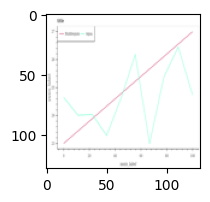

In [147]:
# check the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])

In [148]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]
# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])
y_train
y_train.shape
y_test.shape

(50,)

In [149]:
# we need to map the lables from csv to the images somehow
# function to test the chart sample
def image_sample(x, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(x[index])
    # image_label = train_val_labels.iloc[index]['type']
    # plt.xlabel(image_label)
    plt.xlabel(image_classes[y[index]])

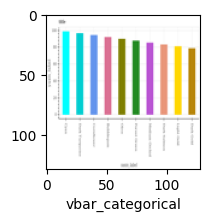

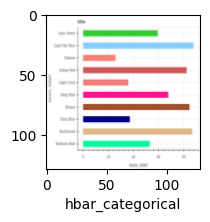

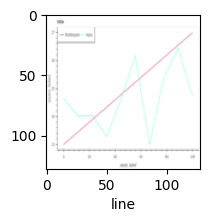

In [150]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,444)

In [151]:
# now we have mapped the corresponding labels to the image

In [152]:
# normalize the image
# x_train[0]/255
x_train=x_train /255
x_test=x_train /255

In [153]:
x_test.shape

(1000, 128, 128, 3)

In [154]:
# take the label for train data from csv file
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

In [155]:
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [156]:
# writing a simple nn to test first
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(128,128,3)),
    Dense(3000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(5, activation='softmax')
    ])
# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 9s 269ms/step - loss: 14.9362 - accuracy: 0.1737
Epoch 2/10
32/32 [==============================] - 8s 260ms/step - loss: 1.6566 - accuracy: 0.2257
Epoch 3/10
32/32 [==============================] - 8s 265ms/step - loss: 1.6124 - accuracy: 0.2548
Epoch 4/10
32/32 [==============================] - 8s 260ms/step - loss: 1.5820 - accuracy: 0.2161
Epoch 5/10
32/32 [==============================] - 8s 261ms/step - loss: 1.6203 - accuracy: 0.2180
Epoch 6/10
32/32 [==============================] - 8s 258ms/step - loss: 1.6020 - accuracy: 0.2347
Epoch 7/10
32/32 [==============================] - 8s 258ms/step - loss: 1.5687 - accuracy: 0.2565
Epoch 8/10
32/32 [==============================] - 8s 261ms/step - loss: 1.6435 - accuracy: 0.2211
Epoch 9/10
32/32 [==============================] - 8s 258ms/step - loss: 1.6020 - accuracy: 0.2330
Epoch 10/10
32/32 [==============================] - 8s 258ms/step - loss: 1.5845 - accuracy: 0.230

In [157]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [158]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 46ms/step - loss: 1.6080 - accuracy: 0.1750


[1.6080071926116943, 0.17499999701976776]

In [159]:
y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]
# print("classificaton report : \n",classification_report(y_test,y_pred_classes))

In [160]:
# here we see the accuracy is very low and we need to modify our nn to add more layers for better accuracy

In [161]:
# Print the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 1.6187 - accuracy: 0.1950 - val_loss: 3.2419 - val_accuracy: 0.1850
Epoch 2/50
1/1 [==============================] - 3s 3s/step - loss: 2.9899 - accuracy: 0.2037 - val_loss: 1.8810 - val_accuracy: 0.1650
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 1.7995 - accuracy: 0.2087 - val_loss: 1.6510 - val_accuracy: 0.1900
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 1.6631 - accuracy: 0.2025 - val_loss: 1.6248 - val_accuracy: 0.2200
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 1.6483 - accuracy: 0.2338 - val_loss: 1.5773 - val_accuracy: 0.3800
Epoch 6/50
1/1 [==============================] - 3s 3s/step - loss: 1.6012 - accuracy: 0.3262 - val_loss: 1.5496 - val_accuracy: 0.3400
Epoch 7/50
1/1 [==============================] - 3s 3s/step - loss: 1.5663 - accuracy: 0.3088 - val_loss: 1.5369 - val_accuracy: 0.2700
Epoch 8/50
1/1 [=========================

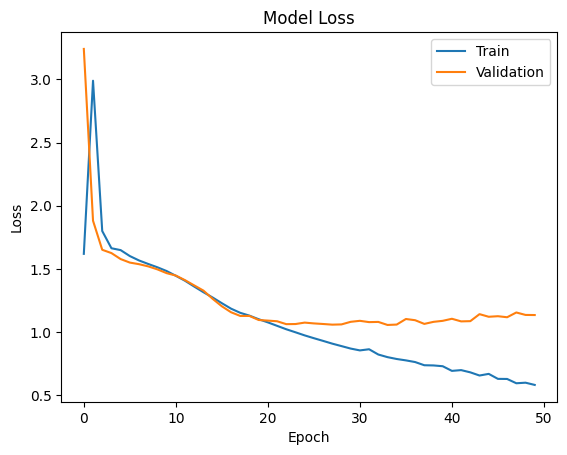

In [162]:
# modify the model architecture to cmnn
cnn_model = Sequential([
    Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [163]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 21ms/step - loss: 1.1341 - accuracy: 0.6100


[1.1340947151184082, 0.6100000143051147]

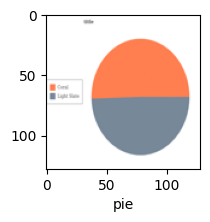

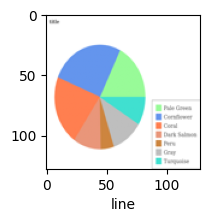

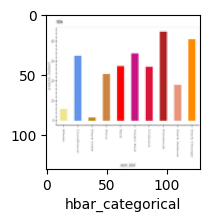

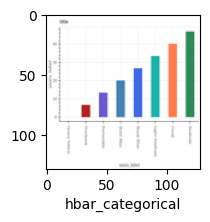

In [164]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [165]:
# Observation: we can see some wrong predictions

In [166]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]

array([[4.8307928e-01, 2.4097459e-01, 1.7780571e-01, 2.0025313e-02,
        7.8115053e-02],
       [3.4848937e-01, 6.6732444e-02, 2.1814350e-02, 4.6176981e-02,
        5.1678681e-01],
       [2.5200549e-01, 1.8905116e-03, 1.8698029e-02, 3.9607268e-03,
        7.2344524e-01],
       [4.8817626e-01, 1.2800607e-04, 1.9964181e-02, 1.8543912e-02,
        4.7318757e-01],
       [5.3525072e-01, 1.6563588e-01, 2.2789039e-01, 1.0040376e-02,
        6.1182607e-02]], dtype=float32)

In [167]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 4, 4, 0, 0]

In [168]:
y_test[:5]

array([0, 4, 4, 4, 0])

In [169]:
# here we see some values are not matching

'dot_line'

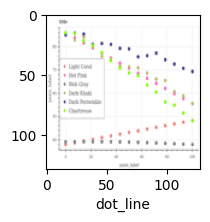

In [170]:
# test actual and predicted
# image_sample(x_test,y_test,1) #actual
# image_classes[y_classes[1]] #predicted
# image_sample(x_test,y_test,10) #actual
# image_classes[y_classes[10]] #predicted
image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

In [171]:
# some values are not matching

In [172]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.45      0.59      0.51        37
           1       0.81      0.68      0.74        44
           2       0.68      0.52      0.59        48
           3       0.45      0.58      0.51        33
           4       0.74      0.68      0.71        38

    accuracy                           0.61       200
   macro avg       0.63      0.61      0.61       200
weighted avg       0.64      0.61      0.62       200



In [173]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[22  5  1  2  7]
 [ 9 30  0  4  1]
 [10  0 25 13  0]
 [ 1  2 10 19  1]
 [ 7  0  1  4 26]]


Text(95.72222222222221, 0.5, 'Actual')

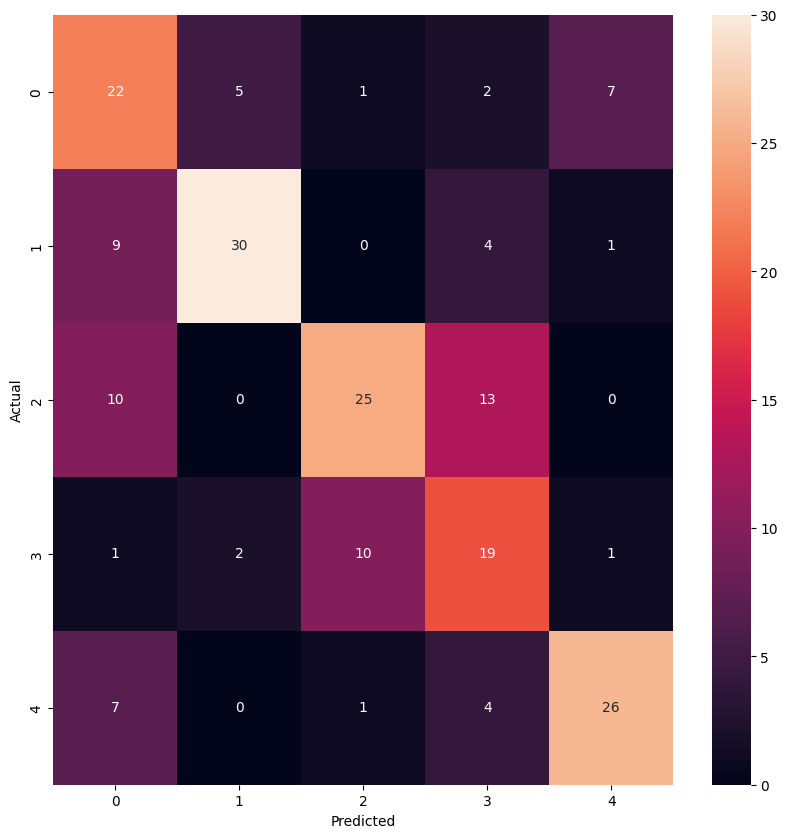

In [174]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [175]:
# for 50 iterations, we can see some promising accuracy, more training will be required for better accuracy
# in the confusion matrix, whatever is not in diagonal is a error

In [176]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [177]:
# Replace the final classification layer with a new layer
pt_model = tf.keras.models.Sequential([
    vgg16_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])


In [178]:
# Freeze the weights of all layers except the new classification layer
for layer in pt_model.layers:
        layer.trainable = False

In [179]:
# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [180]:
# Print the summary of the model architecture
pt_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 645       
Total params: 14,780,997
Trainable params: 0
Non-trainable params: 14,780,997
_________________________________________________________________
